In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

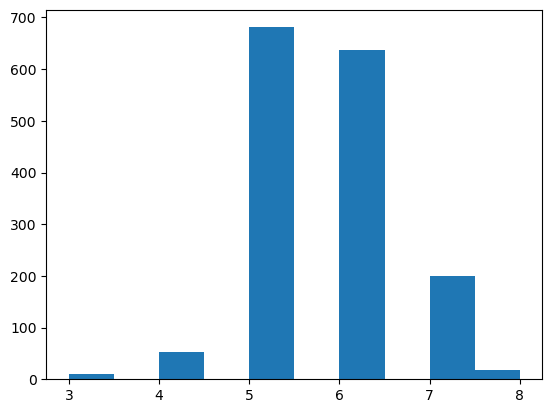

In [14]:
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='pH'>

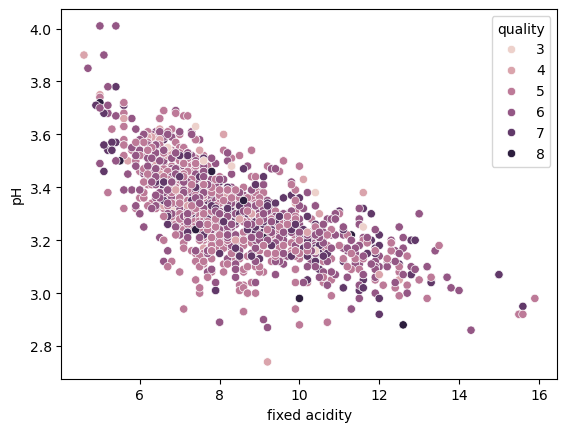

In [20]:
sns.scatterplot(x = "fixed acidity", y = "volatile acidity", hue = "quality", data = data)

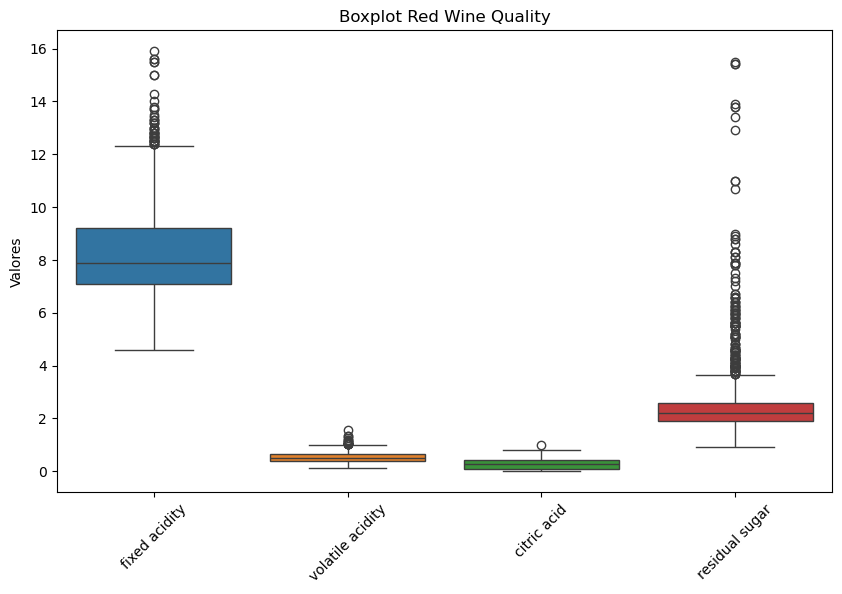

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']])
plt.xticks(rotation=45)
plt.title('Boxplot Red Wine Quality')
plt.ylabel('Valores')
plt.show()

In [24]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']


In [25]:
predictors = data[predictors_col]
target = data[target_col]

In [26]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [27]:
target


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [28]:
corr = predictors.corr()
corr


,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


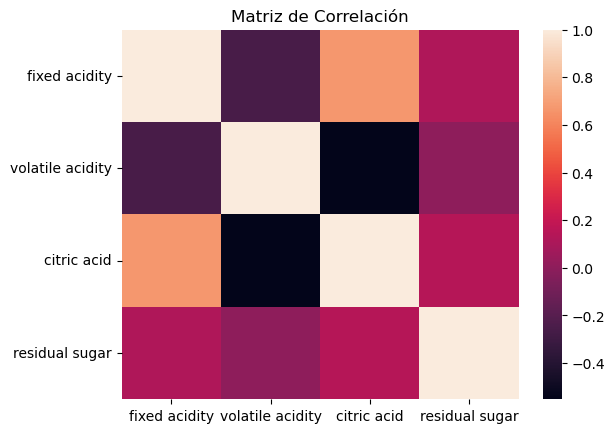

In [29]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [42]:
tree = DecisionTreeClassifier()

In [43]:
arbol = tree.fit(X_train, y_train)

[Text(0.5048417110981613, 0.9833333333333333, 'x[1] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.19269051988933425, 0.95, 'x[1] <= 0.317\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.038624085047054724, 0.9166666666666666, 'x[3] <= 1.65\ngini = 0.597\nsamples = 145\nvalue = [0, 1, 15, 73, 54, 2]'),
 Text(0.0055768560474032764, 0.8833333333333333, 'x[2] <= 0.23\ngini = 0.34\nsamples = 20\nvalue = [0, 0, 2, 16, 2, 0]'),
 Text(0.0027884280237016382, 0.85, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.008365284071104914, 0.85, 'x[3] <= 1.55\ngini = 0.277\nsamples = 19\nvalue = [0, 0, 2, 16, 1, 0]'),
 Text(0.0055768560474032764, 0.8166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0, 0]'),
 Text(0.011153712094806553, 0.8166666666666667, 'x[2] <= 0.38\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 2, 6, 1, 0]'),
 Text(0.008365284071104914, 0.7833333333333333, 'gini = 0.0\nsamples 

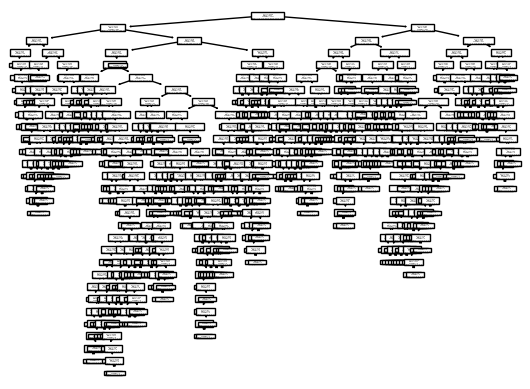

In [44]:
plot_tree(arbol)

In [45]:
predicciones = arbol.predict(X_test)

In [46]:
predicciones

array([5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 7, 6, 7, 6, 7, 5, 8,
       7, 5, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 7, 7, 6, 6,
       5, 7, 6, 7, 6, 6, 7, 6, 5, 5, 7, 4, 5, 7, 7, 5, 5, 5, 5, 7, 7, 7,
       6, 6, 5, 6, 6, 6, 6, 6, 4, 6, 6, 5, 5, 4, 5, 5, 5, 5, 6, 6, 5, 6,
       6, 5, 4, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 7,
       7, 6, 7, 5, 6, 5, 7, 7, 5, 6, 5, 5, 6, 6, 7, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 3, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 4, 7, 5,
       5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 7,
       4, 4, 6, 6, 6, 6, 4, 6, 6, 5, 5, 5, 5, 5, 4, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 7, 5, 5, 6, 6, 7, 5,
       5, 6, 6, 7, 5, 6, 6, 5, 5, 5, 4, 4, 6, 5, 5, 5, 5, 7, 5, 5, 7, 5,
       5, 7, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5,

In [47]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,0,5,3,0,0
5,0,8,86,42,9,1
6,1,4,32,75,12,0
7,0,0,5,10,20,0
8,0,0,3,2,1,0


In [48]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.565625

In [49]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5701212716906771

In [50]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.565625

In [51]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5662887460907521